In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Preprocesing import Process_column
import re

In [92]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [93]:
df = pd.read_csv("emotions.csv").iloc[:10000,:]
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
9995,i feel that shakespeare is a talented man of h...,1
9996,ill be attending college classes and ill have ...,1
9997,i am a girl and i am utterly dependent on my i...,0
9998,ive been feeling less inhibited,4


In [94]:
df.duplicated().sum()

np.int64(1)

In [95]:
df[df.duplicated()]
df.drop_duplicates()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
9995,i feel that shakespeare is a talented man of h...,1
9996,ill be attending college classes and ill have ...,1
9997,i am a girl and i am utterly dependent on my i...,0
9998,ive been feeling less inhibited,4


In [96]:
df.isna().sum()

text     0
label    0
dtype: int64

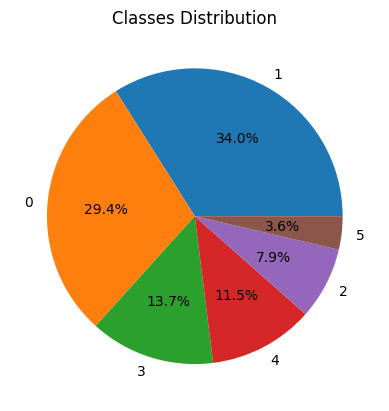

In [97]:
# df["label"].value_counts()

plt.title("Classes Distribution")
plt.pie(df["label"].value_counts(),labels=df["label"].value_counts().keys(),autopct="%1.1f%%")
plt.show()


In [98]:
df["CleanedText"] = df["text"].apply(lambda x: x.lower())
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,i dont know i feel so lost,0,i dont know i feel so lost
4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,i feel that shakespeare is a talented man of h...
9996,ill be attending college classes and ill have ...,1,ill be attending college classes and ill have ...
9997,i am a girl and i am utterly dependent on my i...,0,i am a girl and i am utterly dependent on my i...
9998,ive been feeling less inhibited,4,ive been feeling less inhibited


In [99]:
cleaned = Process_column(Column_name="CleanedText",Dataset=df)

### remove any Single Letters

In [100]:
cleaned.Updeate_column(lambda x: re.sub(r"\b[a-zA-Z]{1}\b",repl="", string=x))
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,just feel really helpless and heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,i gave up my internship with the dmrg and am f...,4,gave up my internship with the dmrg and am fe...
3,i dont know i feel so lost,0,dont know feel so lost
4,i am a kindergarten teacher and i am thoroughl...,4,am kindergarten teacher and am thoroughly w...
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,feel that shakespeare is talented man of his...
9996,ill be attending college classes and ill have ...,1,ill be attending college classes and ill have ...
9997,i am a girl and i am utterly dependent on my i...,0,am girl and am utterly dependent on my ipod...
9998,ive been feeling less inhibited,4,ive been feeling less inhibited


In [101]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [102]:
cleaned.Updeate_column(func=lambda x: word_tokenize(x))
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[just, feel, really, helpless, and, heavy, hea..."
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoyed, being, able, to, slouch, about,..."
2,i gave up my internship with the dmrg and am f...,4,"[gave, up, my, internship, with, the, dmrg, an..."
3,i dont know i feel so lost,0,"[dont, know, feel, so, lost]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[am, kindergarten, teacher, and, am, thoroughl..."
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,"[feel, that, shakespeare, is, talented, man, o..."
9996,ill be attending college classes and ill have ...,1,"[ill, be, attending, college, classes, and, il..."
9997,i am a girl and i am utterly dependent on my i...,0,"[am, girl, and, am, utterly, dependent, on, my..."
9998,ive been feeling less inhibited,4,"[ive, been, feeling, less, inhibited]"


In [103]:
Stopwords__ = stopwords.words("english")
print(f"Number of Stop Words in English = {len(Stopwords__)}")

Number of Stop Words in English = 198


In [104]:
def Remove_Stopwords(text):
    return [word for word in text if word not in Stopwords__]

In [105]:
cleaned.Updeate_column(Remove_Stopwords)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[feel, really, helpless, heavy, hearted]"
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoyed, able, slouch, relax, unwind, fr..."
2,i gave up my internship with the dmrg and am f...,4,"[gave, internship, dmrg, feeling, distraught]"
3,i dont know i feel so lost,0,"[dont, know, feel, lost]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[kindergarten, teacher, thoroughly, weary, job..."
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,"[feel, shakespeare, talented, man, era, abilit..."
9996,ill be attending college classes and ill have ...,1,"[ill, attending, college, classes, ill, bunch,..."
9997,i am a girl and i am utterly dependent on my i...,0,"[girl, utterly, dependent, ipod, feeling, weep..."
9998,ive been feeling less inhibited,4,"[ive, feeling, less, inhibited]"


In [106]:
from nltk.stem import WordNetLemmatizer

Lemmarizer = WordNetLemmatizer()
def Lemmatizong_data(text:list):
    return [Lemmarizer.lemmatize(word=word,pos="v") for word in text]

cleaned.Updeate_column(Lemmatizong_data)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[feel, really, helpless, heavy, hearted]"
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoy, able, slouch, relax, unwind, fran..."
2,i gave up my internship with the dmrg and am f...,4,"[give, internship, dmrg, feel, distraught]"
3,i dont know i feel so lost,0,"[dont, know, feel, lose]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[kindergarten, teacher, thoroughly, weary, job..."
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,"[feel, shakespeare, talented, man, era, abilit..."
9996,ill be attending college classes and ill have ...,1,"[ill, attend, college, class, ill, bunch, stuf..."
9997,i am a girl and i am utterly dependent on my i...,0,"[girl, utterly, dependent, ipod, feel, weepy, ..."
9998,ive been feeling less inhibited,4,"[ive, feel, less, inhibit]"


In [107]:
def to_string(text:list):
    return " ".join(text)

cleaned.Updeate_column(to_string)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoy able slouch relax unwind frankly nee...
2,i gave up my internship with the dmrg and am f...,4,give internship dmrg feel distraught
3,i dont know i feel so lost,0,dont know feel lose
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...
...,...,...,...
9995,i feel that shakespeare is a talented man of h...,1,feel shakespeare talented man era ability writ...
9996,ill be attending college classes and ill have ...,1,ill attend college class ill bunch stuff tell ...
9997,i am a girl and i am utterly dependent on my i...,0,girl utterly dependent ipod feel weepy call hu...
9998,ive been feeling less inhibited,4,ive feel less inhibit


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [109]:
X = df["CleanedText"]
Y = df["label"]

In [110]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [111]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_text)

In [112]:
print(f"number of Features = {len(tfidf.get_feature_names_out())}")

number of Features = 7670


In [113]:
svc = SVC(random_state=42)
svc

SVC(random_state=42)

In [114]:
svc.fit(x_train,y_train)
y_predicted = svc.predict(x_test)

In [115]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {svm_acc * 100:.02f}%")

SVM Accurecy score = 80.13%


In [116]:
model = RandomForestClassifier(random_state=42,n_estimators=80)
model

RandomForestClassifier(n_estimators=80, random_state=42)

In [117]:
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

In [118]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {svm_acc * 100:.02f}%")

SVM Accurecy score = 85.20%


In [119]:
acc = []
estimators = []
for n in range(70,271,5):
    model = RandomForestClassifier(random_state=42,n_estimators=n)
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_test)
    svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
    acc.append(svm_acc*100)
    estimators.append(n)






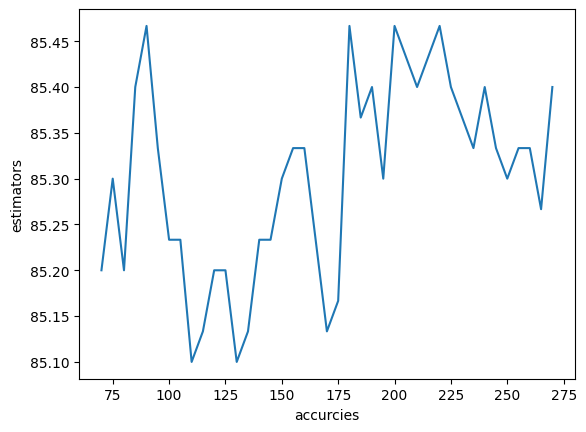

In [121]:
plt.plot(estimators,acc)
plt.xlabel("accurcies")
plt.ylabel("estimators")
plt.show()
